# Deep Reinforcement Learning in Action
### by Alex Zai and Brandon Brown

#### Chapter 2

##### Listing 2.1

In [1]:
def get_best_action(actions):
    best_action = 0
    max_action_value = 0
    for i in range(len(actions)):
        cur_action_value = get_action_value(actions[i])
        if cur_action_value > max_action_value:
            best_action = i
            max_action_value = cur_action_value
    return best_action

##### Listing 2.2

In [2]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
 
n = 10
probs = np.random.rand(n)
eps = 0.2

##### Listing 2.3

In [3]:
def get_reward(prob, n=10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

In [4]:
np.mean([get_reward(0.7) for _ in range(2000)])

7.052

In [5]:
record = np.zeros((n,2))

##### Listing 2.4

In [6]:
def update_record(record,action,r):
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] +
     1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

##### Listing 2.5

In [7]:
def get_best_arm(record):
    arm_index = np.argmax(record[:,1],axis=0)
    return arm_index

##### Listing 2.6

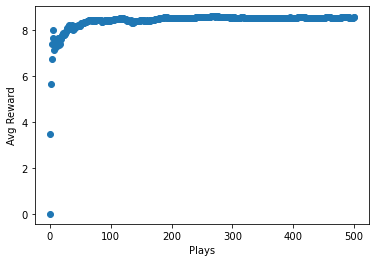

In [8]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
record = np.zeros((n,2))
probs = np.random.rand(n)
eps = 0.2
rewards = [0]
for i in range(500):
    if random.random() > eps:
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

##### Listing 2.7

In [9]:
def softmax(av, tau=1.12):
    softm = np.exp(av / tau) / np.sum( np.exp(av / tau) ) 
    return softm

In [10]:
x = np.arange(10)
av = np.zeros(10)
p = softmax(av)
np.random.choice(x,p=p)

1

##### Listing 2.8

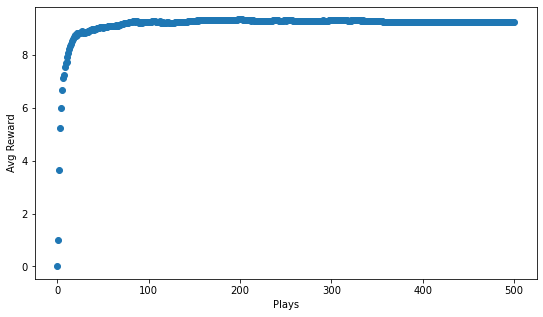

In [11]:
n = 10
probs = np.random.rand(n)
record = np.zeros((n,2))

fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):
    p = softmax(record[:,1])
    choice = np.random.choice(np.arange(n),p=p)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

##### Section 2.4
Working with PyTorch

In [12]:
import numpy
 
numpy.array([[1, 2, 3], [4, 5, 6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
import torch
 
torch.Tensor([[1, 2, 3], [4, 5, 6]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [14]:
x = torch.Tensor([2,4]) #input data
m = torch.randn(2, requires_grad=True) #parameter 1
b = torch.randn(1, requires_grad=True) #parameter 2
y = m*x+b #linear model
y_known = torch.Tensor([5,9])
loss = (torch.sum(y_known - y))**2 #loss function
loss.backward() #calculate gradients
m.grad

tensor([-33.3042, -66.6084])

In [15]:
model = torch.nn.Sequential(
    torch.nn.Linear(10, 150),
    torch.nn.ReLU(),
    torch.nn.Linear(150, 4),
    torch.nn.ReLU(),
)
 
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [16]:
x = torch.randn(10,10)
y_correct = torch.ones(10,4)
for step in range(100):
    y_pred = model(x)
    loss = loss_fn(y_pred, y_correct)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [17]:
from torch.nn import Module, Linear
from torch.functional import F
 
class MyNet(Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = Linear(784, 50)
        self.fc2 = Linear(50, 10)
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
 
model = MyNet()

In [18]:
model(torch.randn(784))

tensor([0.2405, 0.2504, 0.0478, 0.1513, 0.0000, 0.0000, 0.0259, 0.0000, 0.0000,
        0.4150], grad_fn=<ReluBackward0>)

#### Listing 2.9

In [19]:
class ContextBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.init_distribution(arms)
        self.update_state()
        
    def init_distribution(self, arms):
        self.bandit_matrix = np.random.rand(arms,arms)
        
    def reward(self, prob):
        reward = 0
        for i in range(self.arms):
            if random.random() < prob:
                reward += 1
        return reward
        
    def get_state(self):
        return self.state

    def update_state(self):
        self.state = np.random.randint(0,self.arms)
        
    def get_reward(self,arm):
        return self.reward(self.bandit_matrix[self.get_state()][arm])
        
    def choose_arm(self, arm):
        reward = self.get_reward(arm)
        self.update_state()
        return reward

In [20]:
env = ContextBandit(arms=10)
state = env.get_state()
reward = env.choose_arm(1)
print(state)
print(reward)

8
1


In [21]:
import numpy as np
import torch
 
arms = 10
N, D_in, H, D_out = 1, arms, 100, arms

In [22]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.ReLU(),
)

In [23]:
loss_fn = torch.nn.MSELoss()

In [24]:
env = ContextBandit(arms)

In [25]:
def one_hot(N, pos, val=1):
    one_hot_vec = np.zeros(N)
    one_hot_vec[pos] = val
    return one_hot_vec

##### Listing 2.10

In [26]:
def train(env, epochs=10000, learning_rate=1e-3):
    cur_state = torch.Tensor(one_hot(arms,env.get_state()))
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    rewards = []
    for i in range(epochs):
        y_pred = model(cur_state)
        av_softmax = softmax(y_pred.data.numpy(), tau=2.0)
        av_softmax /= av_softmax.sum()
        choice = np.random.choice(arms, p=av_softmax)
        cur_reward = env.choose_arm(choice)
        one_hot_reward = y_pred.data.numpy().copy()
        one_hot_reward[choice] = cur_reward
        reward = torch.Tensor(one_hot_reward)
        rewards.append(cur_reward)
        loss = loss_fn(y_pred, reward)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cur_state = torch.Tensor(one_hot(arms,env.get_state()))
    return np.array(rewards)

In [27]:
results = train(env)

In [28]:
def moving_average(x,step=50,window=500):
    num = (x.shape[0] - window) / step
    num = int(num)
    avg = np.zeros(num)
    slider = np.ones(window) / window
    start = 0
    for i in range(num):
        end = start + window
        avg[i] = slider @ x[start:end]
        start = start + step
    return avg

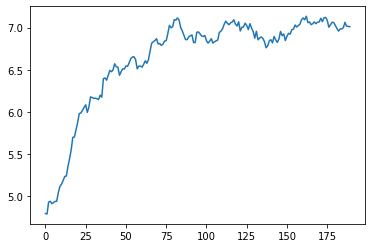

In [29]:
plt.plot(moving_average(results))